In [1]:
import matplotlib.patches as patches
from jupyterthemes import jtplot
from __future__ import division, print_function
from mpl_toolkits.axes_grid1 import make_axes_locatable
# %matplotlib notebook
# %matplotlib notebook
%matplotlib inline
%matplotlib inline
jtplot.style('grade3')
# jtplot.style('monokai')

rcParams['savefig.format'] = 'png'
rcParams['savefig.dpi'] = 800
rcParams['savefig.transparent'] = False
rcParams['savefig.pad_inches'] = 0.0
rcParams['nbagg.transparent'] = False
rcParams['legend.facecolor'] = 'inherit'
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 18
rcParams['font.size'] = 18

### SINGLE TUNE RESONANCES
$m \cdot dQ = p \quad\forall\; m, p \in\mathbb{Z}^* $ <br>
order: $|m|$



## SINGLE TUNE RESONANCES
$m \cdot dQ = p \forall m, p \in\Z $
order: $|m|$


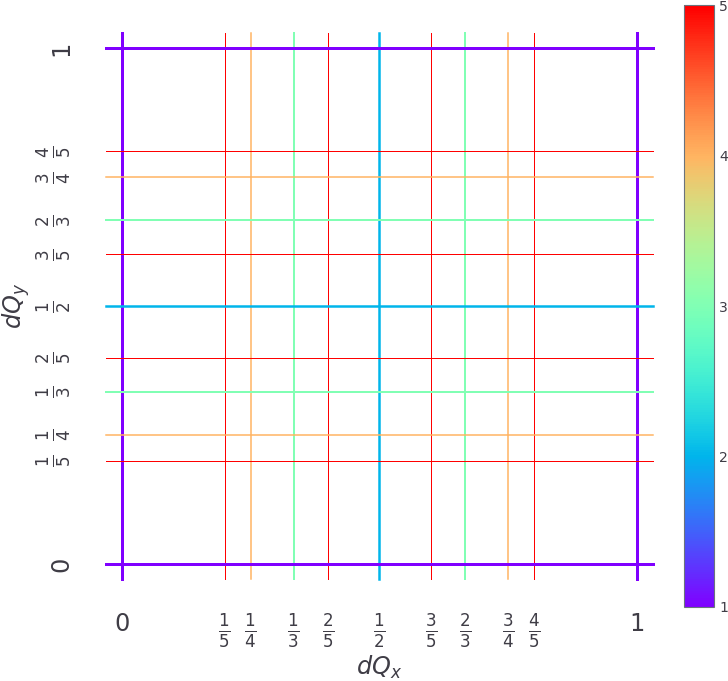

In [20]:
maxorder = 5
axrange = [-0.03, 1.03]
cmap = cm.rainbow
colors = cmap(linspace(0, 1, maxorder))
lws = linspace(3, 1, maxorder)

def fraclabel(n,d):
    return ('$\\frac{' + '{:}'.format(n) + '}{' + '{:}'.format(d) + '}$')

fracs, ticklabels, orders = [0], ['0'], [0]
for d in range(1, maxorder + 1):
    for n in range(1, d):  # numerator/denominator
        if n/d not in fracs:
            orders.append(d - 1)
            fracs.append(n/d)
            ticklabels.append(fraclabel(n, d))
fracs.append(1)
ticklabels.append('1')
orders.append(0)

fig, ax = subplots(1, 1, figsize=[12, 10], frameon=False)
for frac, order in zip(fracs, orders):
    ax.plot([frac, frac], axrange, '-', zorder=190, lw=lws[order], c=colors[order])
    ax.plot(axrange, [frac, frac], '-', zorder=200, lw=lws[order], c=colors[order])


ax.set_xticks(fracs)
ax.set_xticklabels(ticklabels, fontsize=24)
ax.set_xlabel('$dQ_x$', fontsize=24)
ax.set_xlim(axrange)

ax.set_yticks(fracs)
ax.set_yticklabels(ticklabels, fontsize=24, rotation=90, va='center')
ax.set_ylabel('$dQ_y$', fontsize=24)
ax.set_ylim(axrange)

for key in ax.spines:
    ax.spines[key].set_visible(0)

ax.grid(0)
ax.axis('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
sm = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=maxorder-1))
sm._A = []  # fake up the array of the scalar mappable.
cbar = fig.colorbar(sm, cax=cax, orientation='vertical', ticks=range(maxorder))
cbar.ax.set_yticklabels(range(1, maxorder + 1))  # horizontal colorbar

fig.tight_layout()
fig.show()
fig.savefig('resonancediagramm_single.pdf')

In [26]:
#### FAREY SEQUENCE
''' ascending sequence of irreducible fractions between 0 and 1
https://en.wikipedia.org/wiki/Farey_sequence
see also "From Farey sequences to resonance diagrams", R. Tomás
F_1 = [0/1,                          1/1]
F_2 = [0/1,           1/2,           1/1]
F_3 = [0/1,      1/3, 1/2, 2/3,      1/1]
F_4 = [0/1, 1/4, 1/3, 1/2, 2/3, 3/4, 1/1]

F_n   = [..., a/b, c/d, ...]
F_b+d = [..., a/b, (a+c)/(b+d), c/d, ...]

F_n_i = a/b
F_n_j = c/d
F_n_k = (floor((n+b)/d)*c - a)/(floor((n+b)/d)*d - b)
'''

def farey_sequence(n):
    a, b, c, d = 0, 1, 1, n  # F_n's 1st and 2nd element
    Fn = [[a, b]]
    while c <= n:
        Fn.append([c, d])
        flr = int((n + b) / d)
        a, b, c, d = c, d, (flr*c-a), (flr*d-b)
    return Fn

for n in range(1, 9):
    Fn = farey_sequence(n)
    for frac in Fn:
        print('{:}/{:} '.format(frac[0], frac[1]), end='')
    print()

0/1 1/1 
0/1 1/2 1/1 
0/1 1/3 1/2 2/3 1/1 
0/1 1/4 1/3 1/2 2/3 3/4 1/1 
0/1 1/5 1/4 1/3 2/5 1/2 3/5 2/3 3/4 4/5 1/1 
0/1 1/6 1/5 1/4 1/3 2/5 1/2 3/5 2/3 3/4 4/5 5/6 1/1 
0/1 1/7 1/6 1/5 1/4 2/7 1/3 2/5 3/7 1/2 4/7 3/5 2/3 5/7 3/4 4/5 5/6 6/7 1/1 
0/1 1/8 1/7 1/6 1/5 1/4 2/7 1/3 3/8 2/5 3/7 1/2 4/7 3/5 5/8 2/3 5/7 3/4 4/5 5/6 6/7 7/8 1/1 


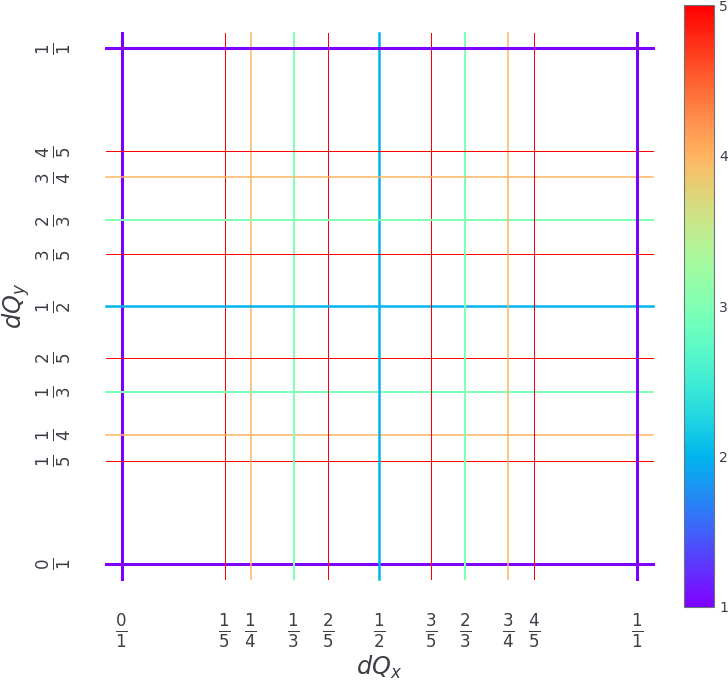

In [40]:
#### SINGLE TUNE RESONANCES ... are simple to find with farey
#     m*dQ = p             with m, p Integer       order = |m|
#     dQ = 1/j  ->  m = j  -> order = j

maxorder = 5
cmap = cm.rainbow
colors = cmap(linspace(0, 1, maxorder))
lws = linspace(3, 1, maxorder)

fracs = farey_sequence(maxorder)
ticklabels = [fraclabel(*frac) for frac in fracs]
orders = [frac[1] - 1 for frac in fracs]
fracs = [frac[0]/frac[1] for frac in fracs]

fig, ax = subplots(1, 1, figsize=[12, 10], frameon=False)
# RESONANCE LINES ON SINGLE TUNE RESONANCES
for frac, order in zip(fracs, orders):
    ax.plot([frac, frac], axrange, '-', lw=lws[order], c=colors[order])  # Qx
    ax.plot(axrange, [frac, frac], '-', lw=lws[order], c=colors[order])  # Qy

ax.set_xticks(fracs)
ax.set_xticklabels(ticklabels, fontsize=24)
ax.set_xlabel('$dQ_x$', fontsize=24)
ax.set_xlim(axrange)

ax.set_yticks(fracs)
ax.set_yticklabels(ticklabels, fontsize=24, rotation=90, va='center')
ax.set_ylabel('$dQ_y$', fontsize=24)
ax.set_ylim(axrange)

for key in ax.spines:
    ax.spines[key].set_visible(0)

ax.grid(0)
axrange = [-0.03, 1.03]
ax.axis('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
sm = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=maxorder-1))
sm._A = []  # fake up the array of the scalar mappable.
cbar = fig.colorbar(sm, cax=cax, orientation='vertical', ticks=range(maxorder))
cbar.ax.set_yticklabels(range(1, maxorder + 1))  # horizontal colorbar

fig.tight_layout()
fig.show()
fig.savefig('resonancediagramm_single_farey.pdf')

In [37]:
#### COUPLING RESONANCES
#     m*dQx + n*dQy = p    with m, n, p Integer    order: |m| + |n|
#     dQx = a/b, dQy = c/d  ->  m = j, n = k  ->   order = j + k

# m*x + n*y = p
# y = (p - m*x)/n
#    m=-1, n=1  -> y = p + x   , p=0, 11 (2nd order: |m| + |n| = 2)
#    m=-1, n=-1 -> y = -p - x  , p=0, 1 (2nd order: |m| + |n| = 2)
#    

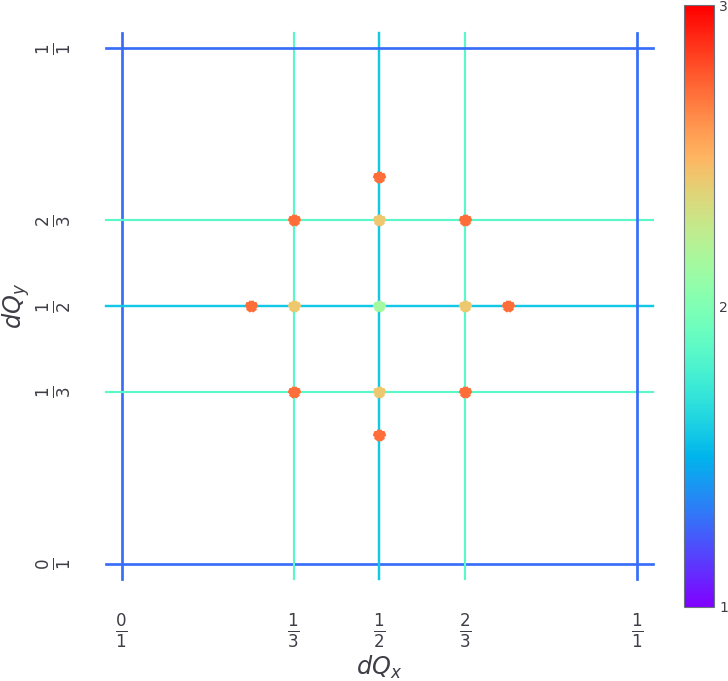

In [109]:
fig, ax = subplots(1, 1, figsize=[12, 10], frameon=False)
ax.grid(0)
axrange = [-0.03, 1.03]
cmap = cm.rainbow

maxorder = 3

colors = cmap(linspace(0, 1, 2*(maxorder + 1)))
lws = linspace(3, 1, 2*(maxorder + 1))

fracs = farey_sequence(maxorder)
ticklabels = [fraclabel(*frac) for frac in fracs]
orders = [frac[1] for frac in fracs]

ordersmesh= meshgrid(orders, orders)
fracs = [frac[0]/frac[1] for frac in fracs]
fracmesh = meshgrid(fracs, fracs)



# RESONANCE LINES ON SINGLE TUNE RESONANCES
for frac, order in zip(fracs, orders):
    ax.plot([frac, frac], axrange, '-', lw=lws[order], c=colors[order])  # Qx
    ax.plot(axrange, [frac, frac], '-', lw=lws[order], c=colors[order])  # Qy


fracs2 = farey_sequence(2*maxorder)[1:-1]
orders = [frac[1] for frac in fracs2]
ordersmesh= meshgrid(orders, orders)
fracs2 = [frac[0]/frac[1] for frac in fracs2]
fracmesh = meshgrid(fracs2, fracs2)

# RESONANCE STARS ON COUPLING RESONANCES
for frac1, frac2, order1, order2 in zip(fracmesh[0].flatten(), fracmesh[1].flatten(), ordersmesh[0].flatten(), ordersmesh[1].flatten()):
    order = order1 + order2
    if order <= 2*maxorder:
        ax.plot(frac1, frac2, '*', ms=10, mew=5, c=colors[order])

ax.set_xticks(fracs)
ax.set_xticklabels(ticklabels, fontsize=24)
ax.set_xlabel('$dQ_x$', fontsize=24)
ax.set_xlim(axrange)

ax.set_yticks(fracs)
ax.set_yticklabels(ticklabels, fontsize=24, rotation=90, va='center')
ax.set_ylabel('$dQ_y$', fontsize=24)
ax.set_ylim(axrange)

for key in ax.spines:
    ax.spines[key].set_visible(0)

ax.axis('equal')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

sm = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=maxorder-1))
sm._A = []  # fake up the array of the scalar mappable.
cbar = fig.colorbar(sm, cax=cax, orientation='vertical', ticks=range(maxorder))
cbar.ax.set_yticklabels(range(1, maxorder + 1))  # horizontal colorbar

fig.tight_layout()
fig.show()
# fig.savefig('resonancediagramm.pdf')

(2, 10, 10)
(10, 10)
(10, 10)


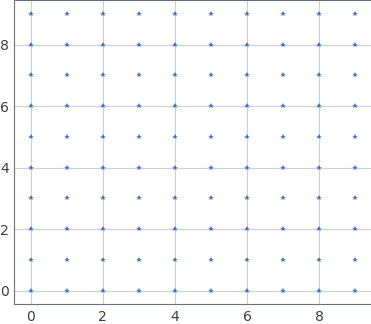

In [87]:
x = range(10)
y = range(10)
xy = meshgrid(x, y)
print(shape(xy))
print(shape(xy[0]))
print(shape(xy[1]))

plot(xy[0], xy[1], '*b')
show()

In [110]:
# define gcd function
def gcd(x, y):
   """This function implements the Euclidian algorithm
   to find greatest common divisor (gcd) of two numbers"""
   while(y):
       x, y = y, x % y
   return x

# define lcm function
def lcm(x, y):
   """This function takes two
   integers and returns the L.C.M."""

   lcm = (x*y)//gcd(x,y)
   return lcm

In [113]:
gcd(3, 9)

3